In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
htru2 = fetch_ucirepo(id=372)

# data (as pandas dataframes)
X = htru2.data.features
y = htru2.data.targets


In [ ]:
data = pd.concat([X, y], axis = 1, join = "inner")

In [ ]:
data

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
print(data.head())

   Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis  class  
0  19.110426     7.975532    74.242225      0  
1  14.860146    10.576487   127.393580      0  
2  21.744669     7.735822    63.171909      0  
3  20.959280     6.896499    53.593661      0  
4  11.468720    14.269573   252.567306      0  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [ ]:
print(data.describe())

       Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
count  17898.000000   17898.000000      17898.000000      17898.000000   
mean     111.079968      46.549532          0.477857          1.770279   
std       25.652935       6.843189          1.064040          6.167913   
min        5.812500      24.772042         -1.876011         -1.791886   
25%      100.929688      42.376018          0.027098         -0.188572   
50%      115.078125      46.947479          0.223240          0.198710   
75%      127.085938      51.023202          0.473325          0.927783   
max      192.617188      98.778911          8.069522         68.101622   

            DM_mean      DM_stdev   DM_skewness   DM_kurtosis         class  
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000  
mean      12.614400     26.326515      8.303556    104.857709      0.091574  
std       29.472897     19.470572      4.506092    106.514540      0.288432  
min        0.213211  

In [ ]:
print(data.isnull().sum())

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

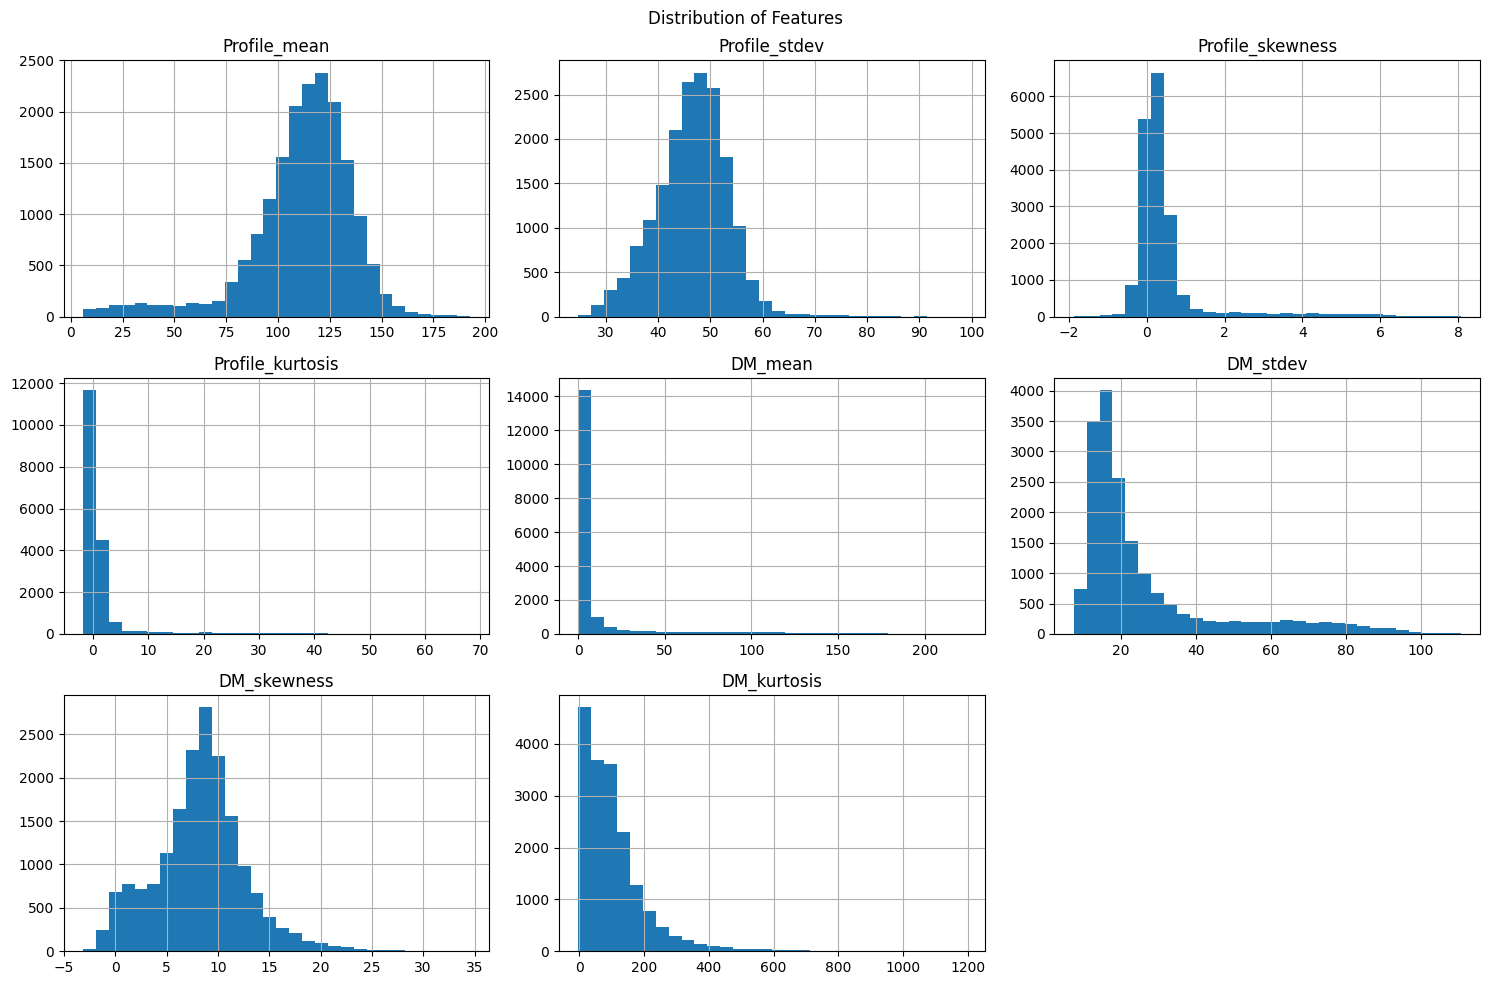

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
data.drop('class', axis=1).hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()


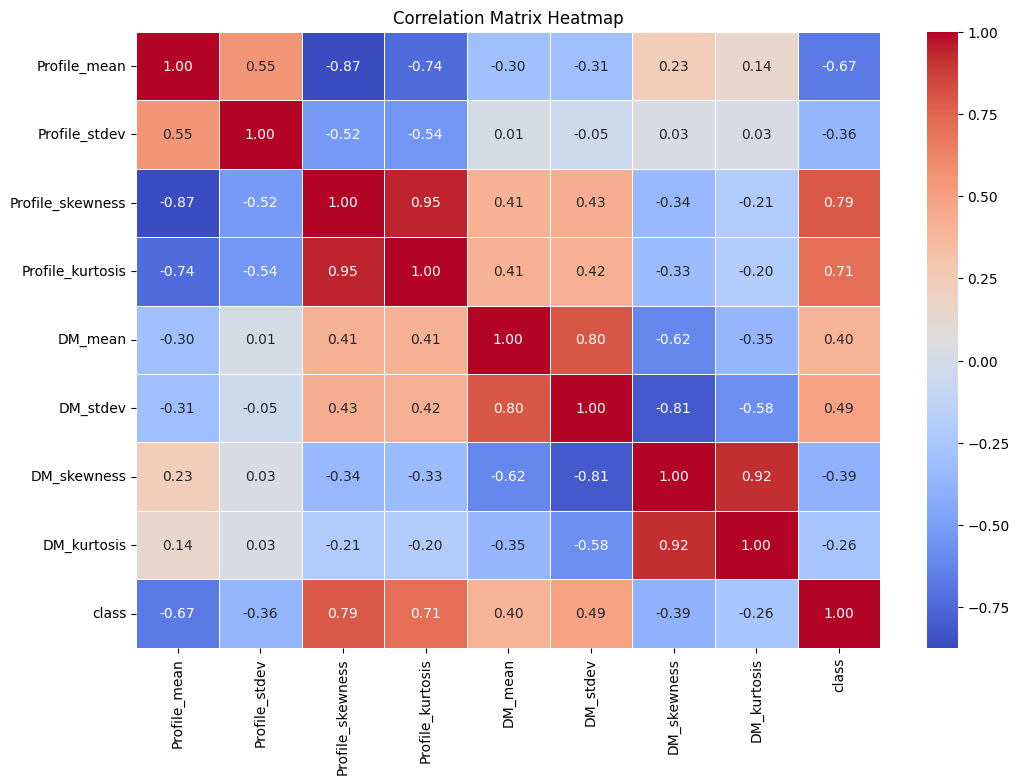

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


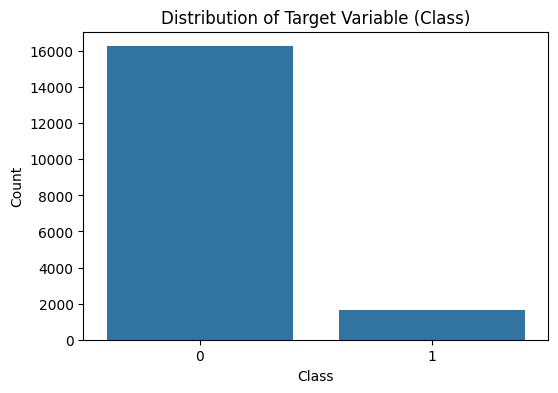

In [ ]:
# Count plot of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


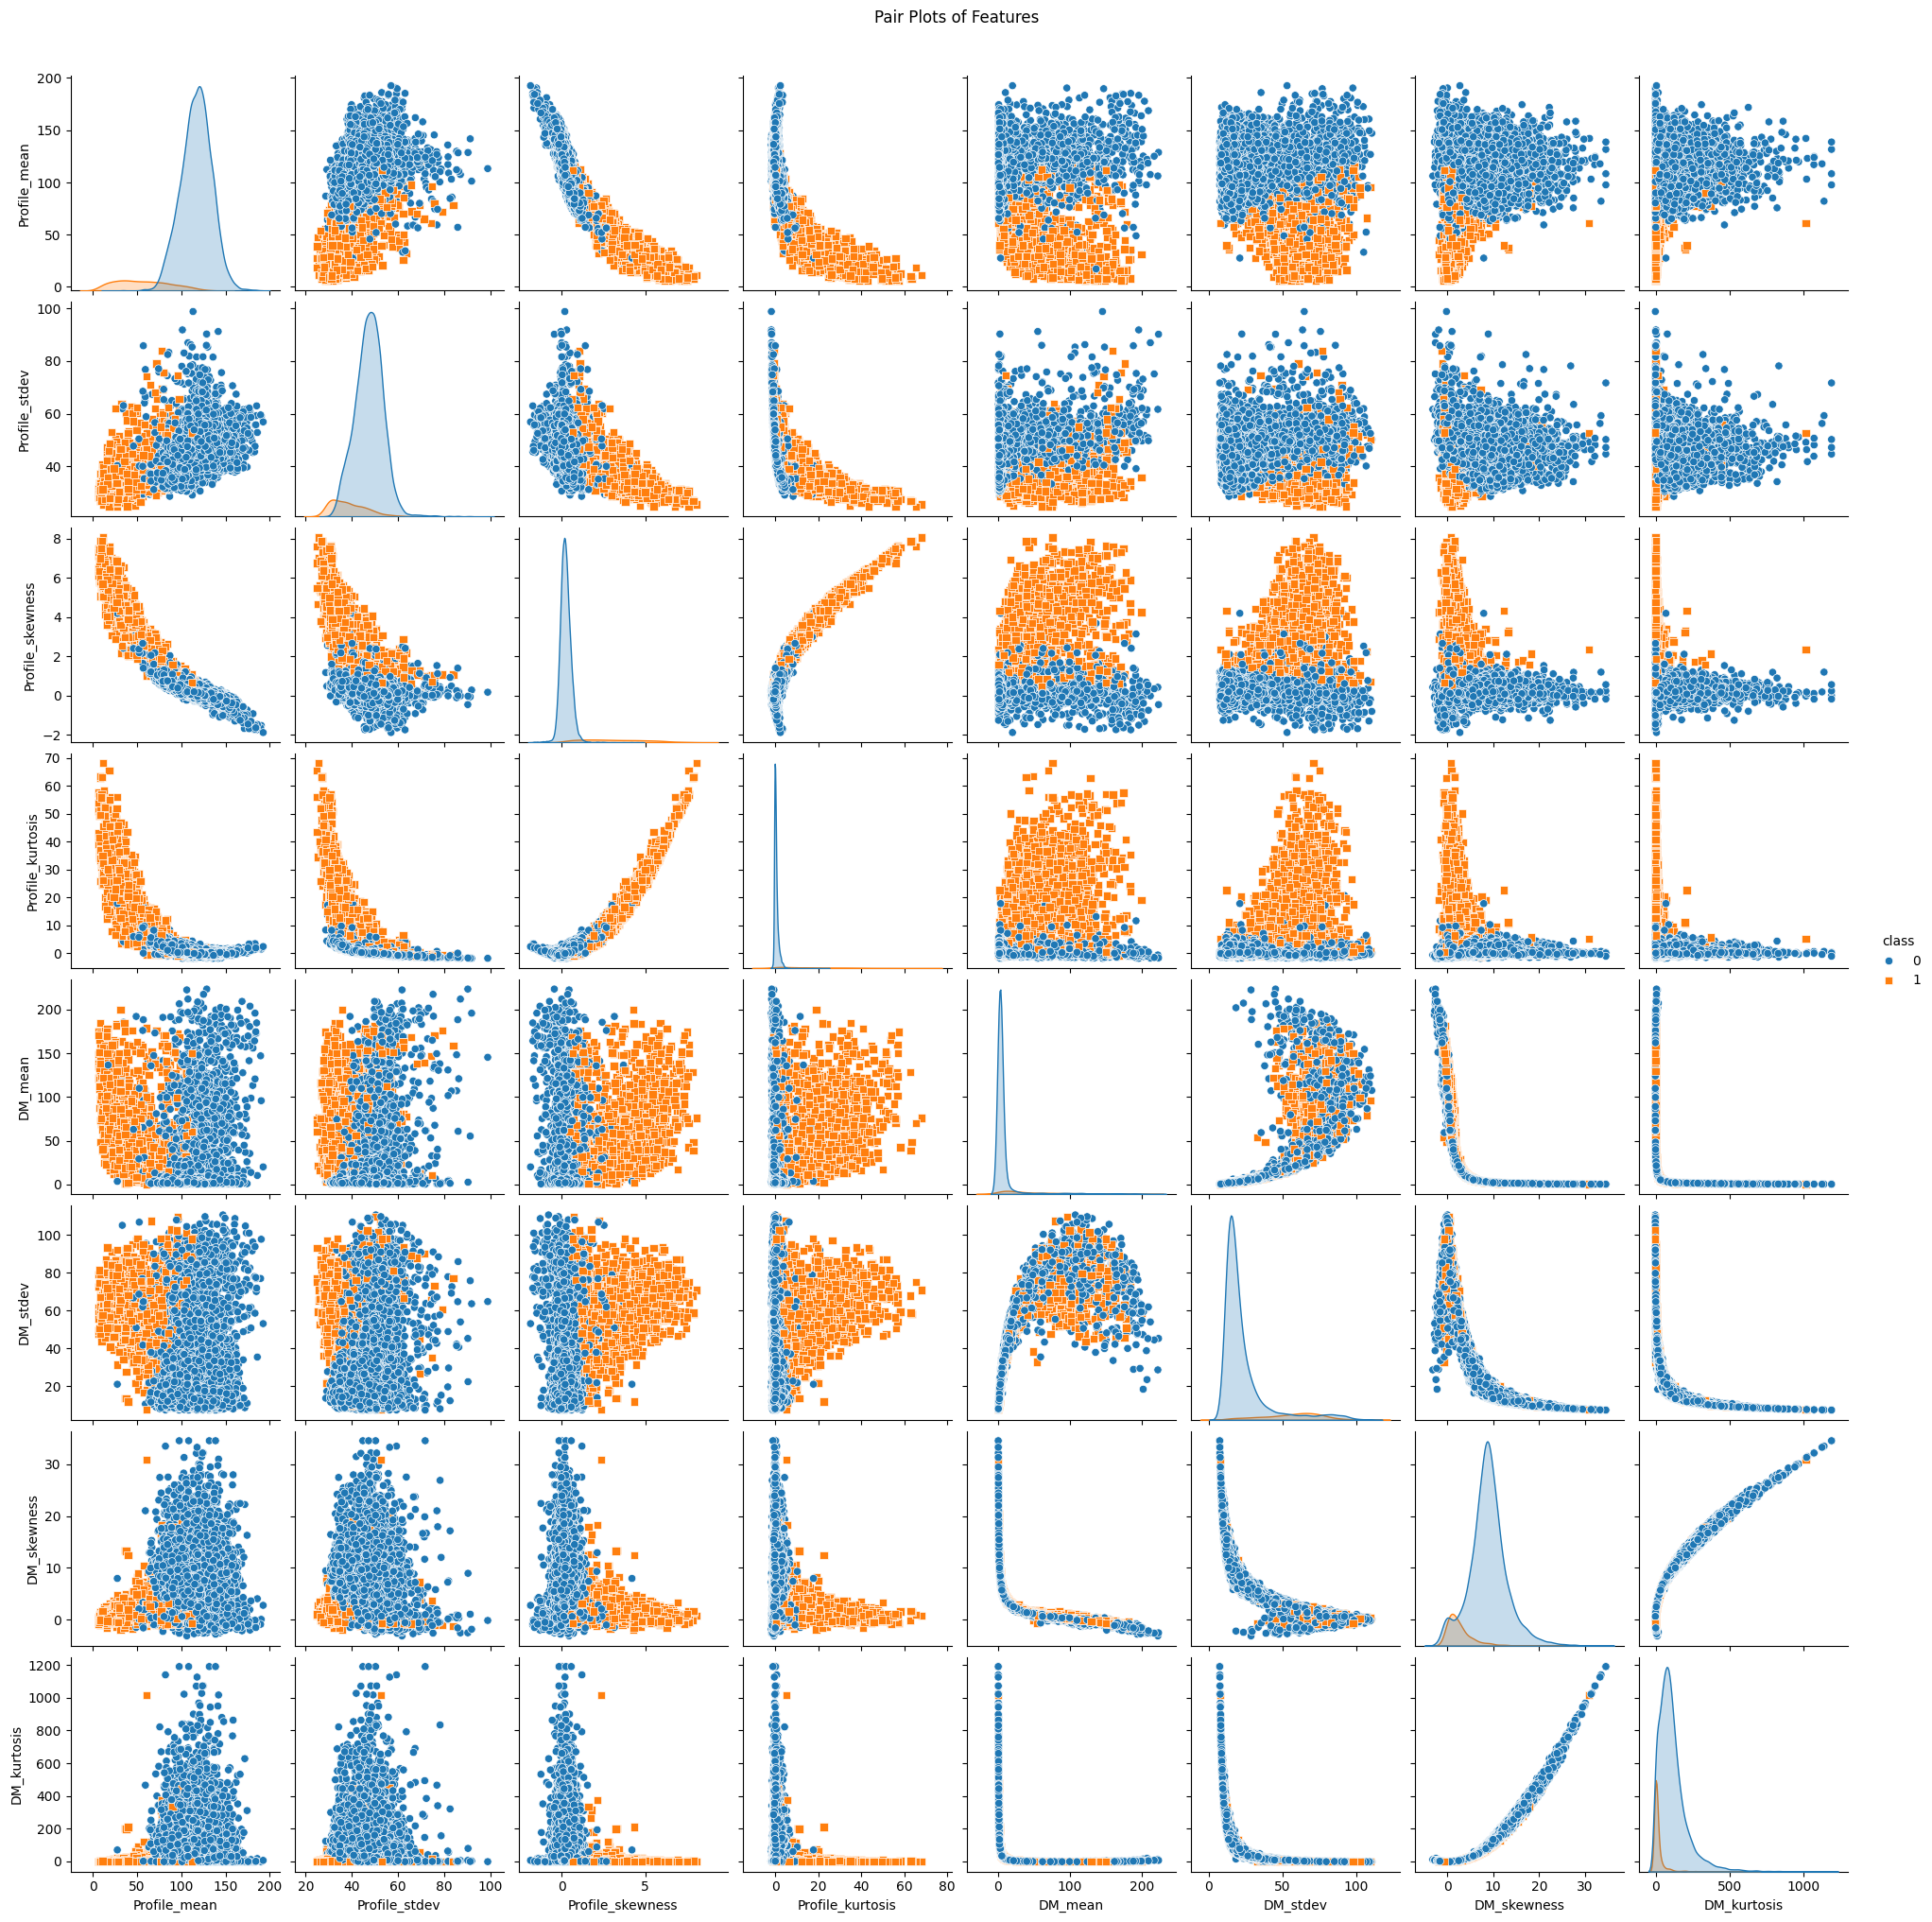

In [ ]:
# Pair plot
sns.pairplot(data, hue='class', diag_kind='kde', markers=['o', 's'])
plt.suptitle("Pair Plots of Features", y=1.02)
plt.show()
